# Libraries

In [48]:
import pickle
import pandas as pd
import seaborn as sns
from os.path import exists
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Loading the Files

Download the csv files into the `data/` directory.

train.csv shape is  (8000, 9)
test.csv shape is  (212192, 9)

        Id   ProductId          UserId  HelpfulnessNumerator  \
0   914403  B0009W5KHM   AV6QDP8Q0ONK4                     2   
1   354887  6303079709  A2I8RXJN80A2D2                     0   
2  1407653  B004H0M2XC  A3FHV3RV8Z12E6                     0   
3  1377458  B003ZJ9536  A12VLTA3ZHVPUY                     1   
4   475323  630574453X  A13NM1PES9OXVN                     2   

   HelpfulnessDenominator        Time  \
0                       2  1341014400   
1                       0  1168819200   
2                       0  1386201600   
3                       1  1348704000   
4                       3   970012800   

                                         Summary  \
0                                  GOOD FUN FILM   
1                                   Movie Review   
2             When is it a good time to Consent?   
3                                          TRUTH   
4  Intelligent and bittersweet -- stays with y

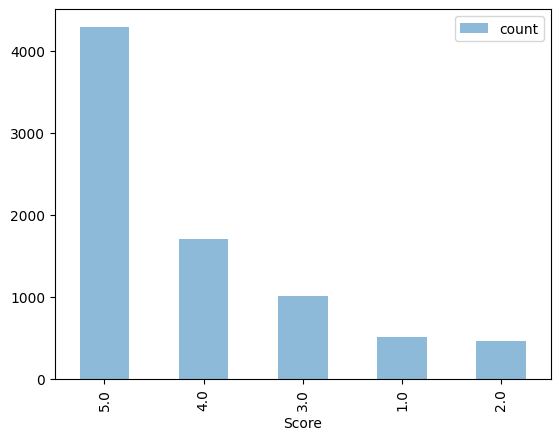


EVERYTHING IS PROPERLY SET UP! YOU ARE READY TO START


In [49]:
trainingSet = pd.read_csv("./train.csv")[:8000]
testingSet = pd.read_csv("./mytest.csv")

print("train.csv shape is ", trainingSet.shape)
print("test.csv shape is ", testingSet.shape)

print()

print(trainingSet.head())
print()
print(testingSet.head())

print()

print(trainingSet.describe())

trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.show()

print()
print("EVERYTHING IS PROPERLY SET UP! YOU ARE READY TO START")

# Adding Features

In [56]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

keyword_scores = {
    'great':2,'love':2,'excellent': 2,'awesome':2,
    'bad': -1,'boring':-1, 'not':-1,'stupid':-1,
    'terrible':-2,'awful': -2,
    'good': 1, 'fun': 1,'fine':1,'nice':1
}
def calculate_score(summary):
    if pd.isna(summary):
        return 0
    words = summary.lower().split()
    score = sum(keyword_scores.get(word, 0) for word in words)
    return score

def add_features_to(df):
    # This is where you can do all your feature extraction

    df['Helpfulness'] = (df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'])*10
    df['Helpfulness'] = df['Helpfulness'].fillna(0)
    df['SummaryScore'] = df['Summary'].apply(calculate_score)*0
    #print(df['SummaryScore'][:5])
    return df

# Load the feature extracted files if they've already been generated

# Process the DataFrame
train = add_features_to(trainingSet)
test = add_features_to(testingSet)
scaler = StandardScaler()

# 选择需要标准化的列（假设是 'Feature1' 和 'Feature2'）
features = ['Helpfulness', 'Time','SummaryScore']

# 对特征进行标准化
train[features] = scaler.fit_transform(train[features])
test[features]= scaler.fit_transform(test[features])
scaler = MinMaxScaler()
train[features] = scaler.fit_transform(train[features])
test[features] = scaler.transform(test[features])
# Merge on Id so that the submission set can have feature columns as well
X_submission = test

# The training set is where the score is not null
X_train =  train[train['Score'].notnull()]
X_train.to_csv("./X_train.csv", index=False)

# Sample + Split into training and testing set

In [57]:
# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
    X_train.drop(columns=['Score']),
    X_train['Score'],
    test_size=1/4.0,
    random_state=0
)

# Feature Selection

In [58]:
features = [ 'Time','HelpfulnessDenominator' ,'SummaryScore','UserId','ProductId','Helpfulness']

X_train_select = X_train[features]
X_test_select = X_test[features]
X_submission_select = X_submission[features]


# Model Creation

In [59]:
# Learn the model
#model = KNeighborsClassifier(n_neighbors=3).fit(X_train_select, Y_train)
# import numpy as np
# print(np.array(X_train_select))
# print(X_train_select)
import KNN
import importlib
importlib.reload(KNN)
model=KNN.CustomKNN(n_neighbors=38,use_weights="helpful")
model.fit(X_train_select, Y_train)
# Predict the score using the model
Y_test_predictions = model.predict(X_test_select)
# Evaluate your model on the testing set
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))

init
fit (6000, 4)
Accuracy on testing set =  0.5325


# Model Evaluation

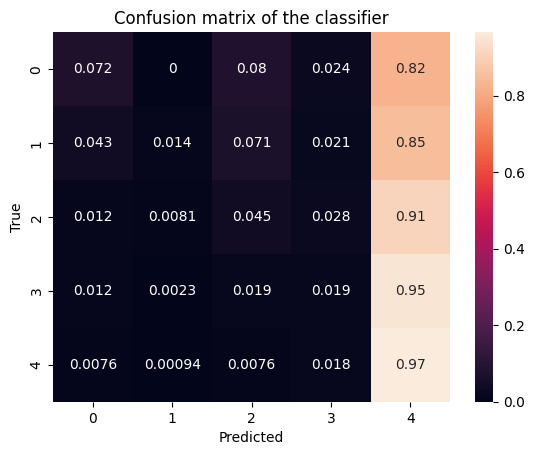

In [54]:
# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Create submission file

In [55]:
# Create the submission file
#X_submission_select=X_submission_select[:100]
# print(X_submission_select.shape)
# X_submission['Score'] = model.predict(X_submission_select)
# submission = X_submission[['Id', 'Score']]
# submission.to_csv("./submission.csv", index=False)